In [1]:
#1. Introduction 
# In this notebook we will explore a dataset of over 2000 rows
# The goal is practice data analytics using Python and create a clean - project
# We will clean the data, preform EDA and generate insight

In [2]:
# 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

In [3]:
# settings
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
# 3. Load dataset
df = pd.read_csv('C:/Users/title/Port/Books.csv')

In [5]:
# quick look at the deta
df.head()

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
3,Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2049 non-null   object
 1   author          2049 non-null   object
 2   pages           2049 non-null   object
 3   genre           2049 non-null   object
 4   description     2049 non-null   object
 5   published_date  2049 non-null   object
 6   publisher       2049 non-null   object
 7   language        2049 non-null   object
 8   average_rating  2049 non-null   object
 9   ratings_count   2049 non-null   int64 
 10  thumbnail       2049 non-null   object
dtypes: int64(1), object(10)
memory usage: 176.2+ KB


In [7]:
# 4. Initial cleaning
# convert 'pgae' to numeric
df['pages'] = pd.to_numeric(df['pages'], errors = 'coerce')

In [8]:
# clean average_rating
df = df[df['average_rating'] != 'No rating']
df['average_rating'] = pd.to_numeric(df['average_rating'], errors = 'coerce')

In [9]:
# split year from text
df['Year'] = df['published_date'].str.extract(r'(\d{4})')

In [10]:
# convert 'published_date' to datetime
df['published_date'] = pd.to_datetime(df['published_date'], errors = 'coerce')

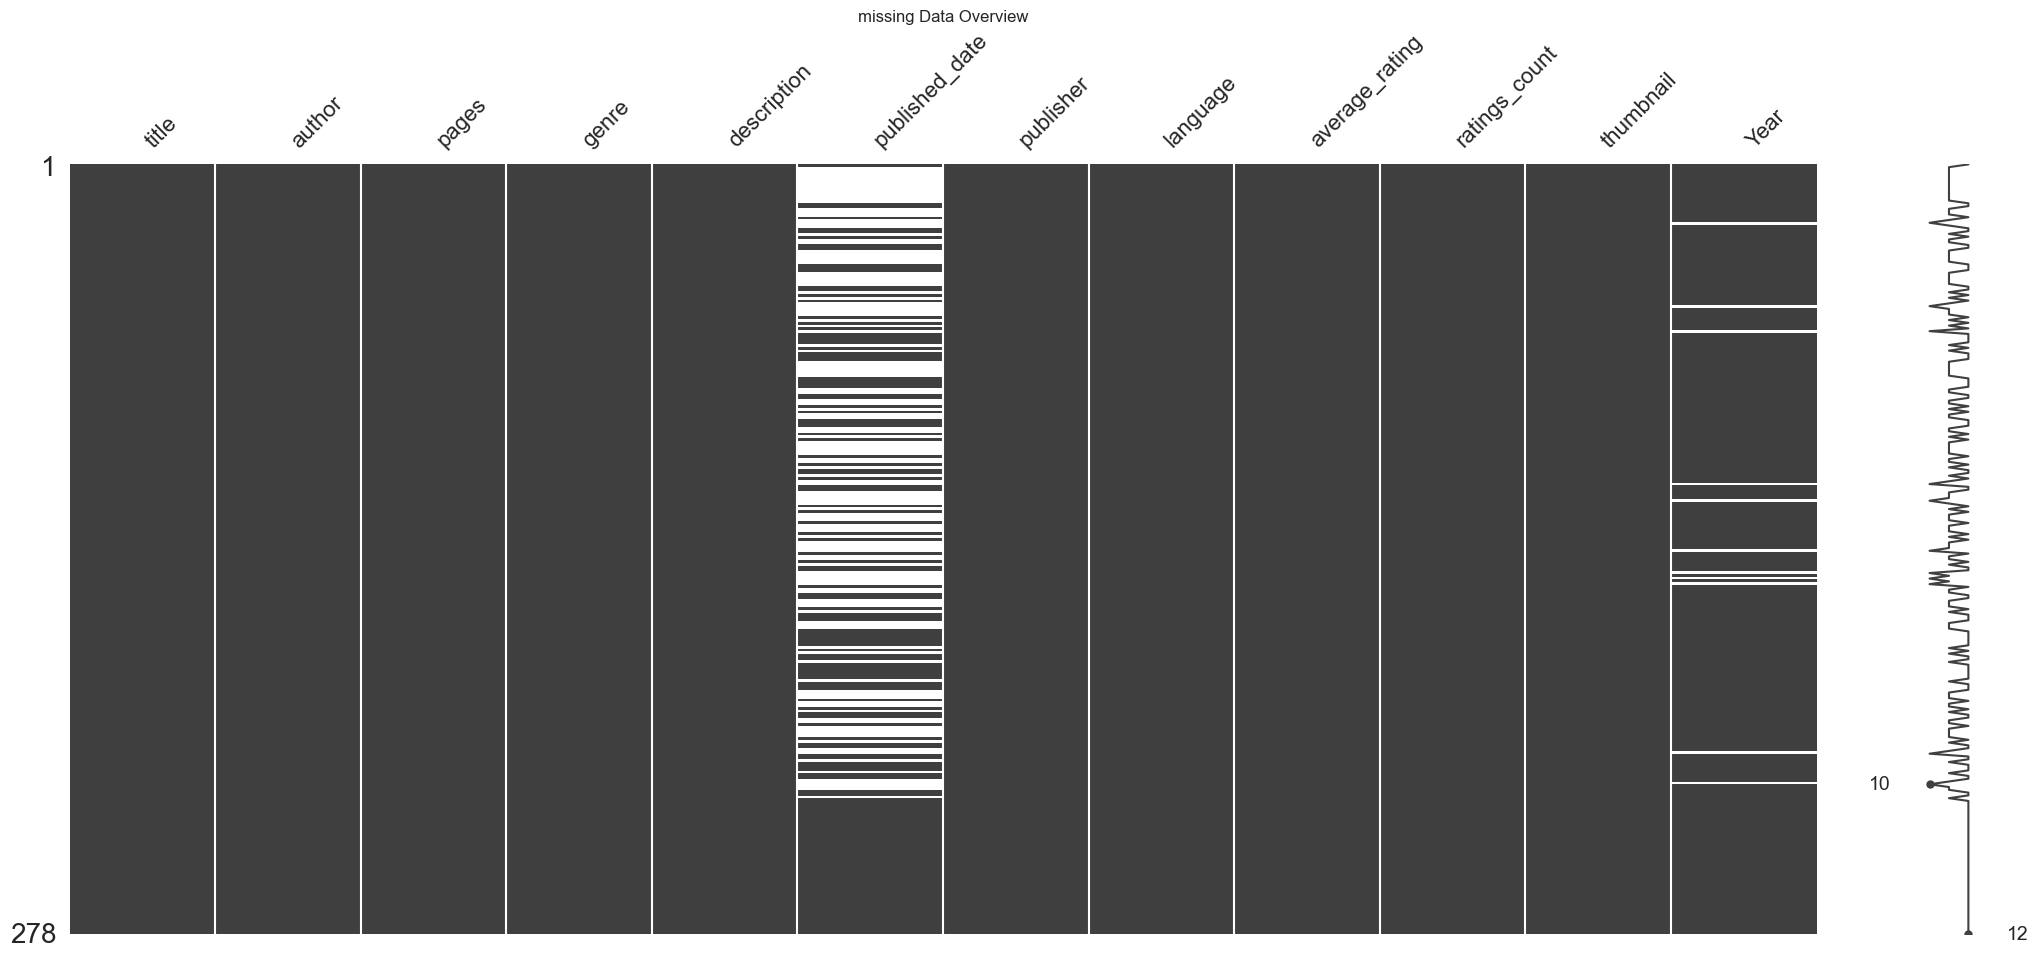

In [11]:
# check for missing data
msno.matrix(df)
plt.title('missing Data Overview')
plt.show()

In [12]:
df['published_date']

12     2014-04-08
31            NaT
40            NaT
41            NaT
42            NaT
          ...    
2044   2016-01-05
2045   2001-04-01
2046   2004-12-28
2047   1999-03-01
2048   2023-05-16
Name: published_date, Length: 278, dtype: datetime64[ns]

In [13]:
# drop columns not useful for analysis
df = df.drop(columns = ['thumbnail'])

In [14]:
df

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,Year
12,Encyclopedia of the Novel,Paul Schellinger,838.0,Literary Criticism,The Encyclopedia of the Novel is the first ref...,2014-04-08,Routledge,en,3.0,2,2014
31,The Bohemian,Unknown Author,896.0,Unknown Genre,No description available,NaT,Unknown Publisher,en,5.0,1,1908
40,Popular Science,Unknown Author,122.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,5.0,4,1931
41,Popular Science,Unknown Author,134.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,4.0,2,1872
42,Popular Science,Unknown Author,290.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,5.0,2,1950
...,...,...,...,...,...,...,...,...,...,...,...
2044,The Index Card,"Helaine Olen, Harold Pollack",256.0,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,2016
2045,The Road to Wealth,Suze Orman,608.0,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,2001
2046,The Success Principles,Jack Canfield,512.0,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,2004
2047,The Courage to Be Rich,Suze Orman,448.0,Personal Finance,Combines emotional and practical advice for bu...,1999-03-01,Riverhead Books,en,4.0,40000,1999


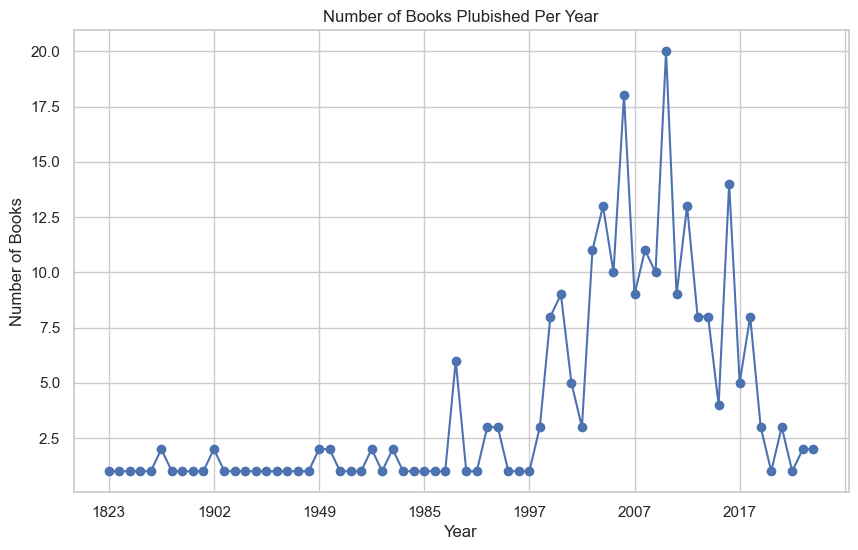

In [15]:
# 5. Exploratory data analysis (EDA)
# number of book per year

books_per_year = df['Year'].value_counts().sort_index()
books_per_year.plot(kind = 'line', marker = 'o', title = 'Number of Books Plubished Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

In [16]:
df

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,Year
12,Encyclopedia of the Novel,Paul Schellinger,838.0,Literary Criticism,The Encyclopedia of the Novel is the first ref...,2014-04-08,Routledge,en,3.0,2,2014
31,The Bohemian,Unknown Author,896.0,Unknown Genre,No description available,NaT,Unknown Publisher,en,5.0,1,1908
40,Popular Science,Unknown Author,122.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,5.0,4,1931
41,Popular Science,Unknown Author,134.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,4.0,2,1872
42,Popular Science,Unknown Author,290.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,5.0,2,1950
...,...,...,...,...,...,...,...,...,...,...,...
2044,The Index Card,"Helaine Olen, Harold Pollack",256.0,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,2016
2045,The Road to Wealth,Suze Orman,608.0,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,2001
2046,The Success Principles,Jack Canfield,512.0,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,2004
2047,The Courage to Be Rich,Suze Orman,448.0,Personal Finance,Combines emotional and practical advice for bu...,1999-03-01,Riverhead Books,en,4.0,40000,1999


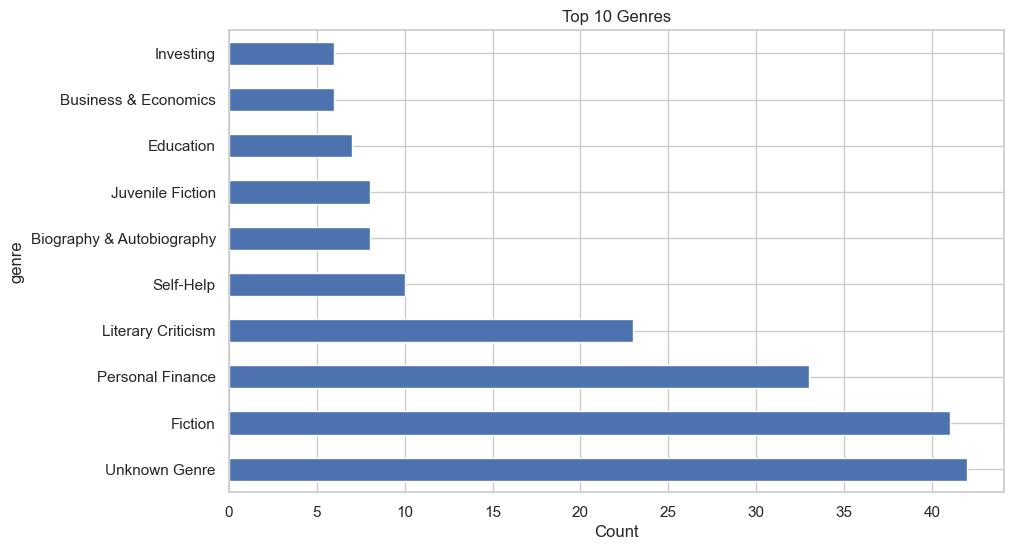

In [18]:
# Most common genres

df['genre'].value_counts().head(10).plot(kind = 'barh', title = 'Top 10 Genres')
plt.xlabel('Count')
plt.show()

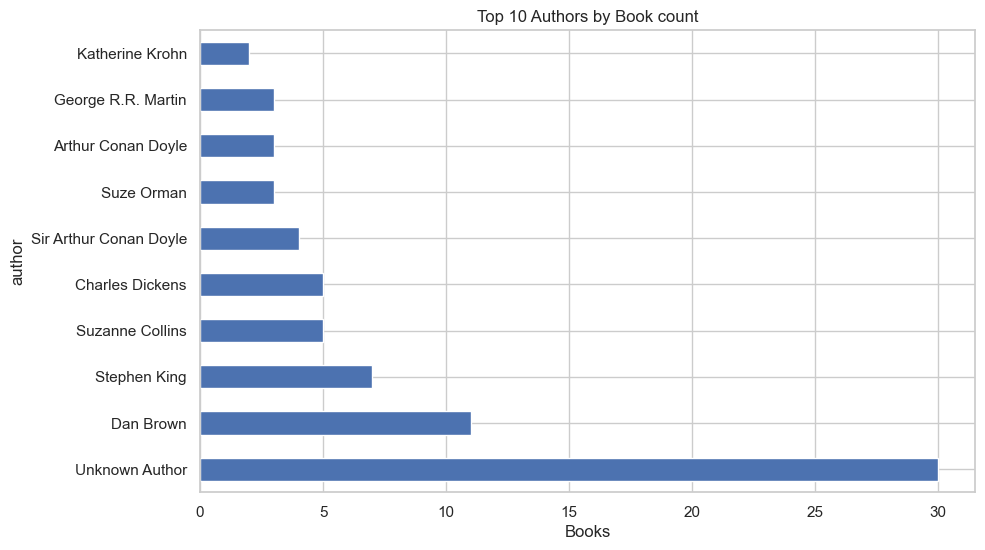

In [19]:
# Top authors by number of books

df['author'].value_counts().head(10).plot(kind = 'barh', title = 'Top 10 Authors by Book count')
plt.xlabel('Books')
plt.show()

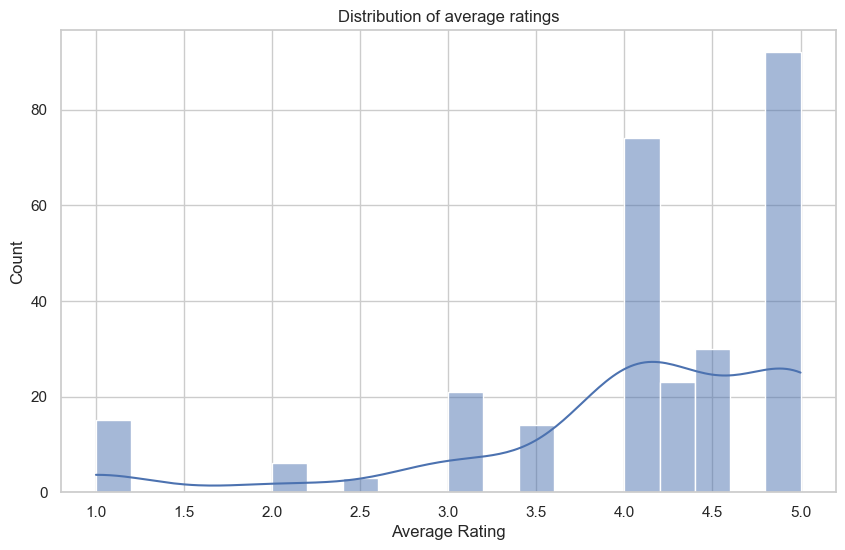

In [21]:
# Distribution of average ratings

sns.histplot(df['average_rating'], bins = 20, kde = True)
plt.title("Distribution of average ratings")
plt.xlabel('Average Rating')
plt.show()

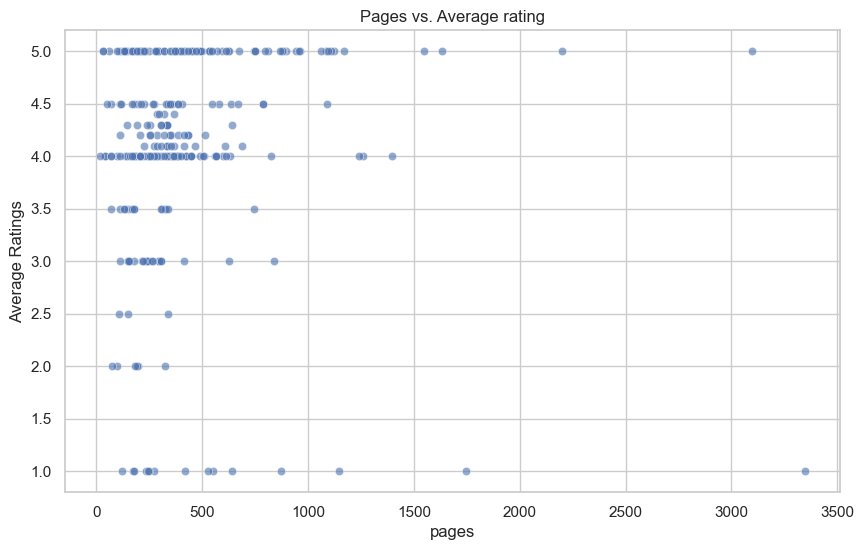

In [23]:
# Pages vs Rating

sns.scatterplot(data = df, x = 'pages', y = 'average_rating', alpha = 0.6)
plt.title('Pages vs. Average rating')
plt.xlabel('pages')
plt.ylabel('Average Ratings')
plt.show()

In [27]:
# Highly rated books with enough reviews
top_books = df[df['ratings_count'] > 50].sort_values(by = 'average_rating', ascending = False).head(10)
top_books[['title', 'author', 'average_rating', 'ratings_count']]

,title,author,average_rating,ratings_count
1019,Adventures of Sherlock Holmes,Sir Arthur Conan Doyle,4.5,486
1020,The Hunger Games,Suzanne Collins,4.5,333
2017,The Barefoot Investor,Scott Pape,4.4,100000
2012,The Simple Path to Wealth,JL Collins,4.4,80000
2008,Atomic Habits,James Clear,4.4,700000
2013,Get Good with Money,Tiffany Aliche,4.4,50000
2040,The Wealth Choice,Dennis Kimbro,4.3,20000
2015,The Millionaire Fastlane,MJ DeMarco,4.3,90000
2036,The Compound Effect,Darren Hardy,4.3,90000
2009,The Richest Man in Babylon,George S. Clason,4.3,400000


# Key insight
 Most books were published between 1990 and 2015
 Fiction and Reference are the most common genres
 Books with more pages do not necessarily recieve higher ratings
 Some author consistently produce high-rated books

# Recommendations
 Publishers could invest more in genres that how high engagement
 Adding more user reviews and ratings could provide better insight into popularity

# Conclusion
This is show the pipeline from data to insight generations by using Python

# Introducing
Hello my name is Chanoot Jaisuda I'm recently graduated from Kasetsart University, Bachelor of science in mathematics. I hope you're enjoy my project.